In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
def fourier(tiempo,voltaje):
    t_max=np.max(tiempo)
    Ts=t_max/len(tiempo)
    Fs=1/Ts
    amplitude=np.abs(np.fft.fft(voltaje))/(len(tiempo)/2)
    F=Fs*np.arange(0,len(voltaje))/len(voltaje)
    return F[0:len(F)//2], amplitude[0:len(F)//2]

In [3]:
def descripcion(data, bins=10, time_name="TIME", voltaje_name="CH1", ylim_serie_temporal=(-0.4, 0.4), ylim_serie_frecuencias=(0,0.005), invertir=False):
    plt.figure(figsize=(18,15))
    decimal=5
    plt.subplot(3,1,1)
    data[voltaje_name].hist(density=True,label="<v>= {} \n std= {}".format(round(data[voltaje_name].mean(),decimal),round(data[voltaje_name].std(),decimal-2)), bins=bins)
    plt.title("Histograma del ruido",fontsize=20)
    plt.xlabel('Voltaje',fontsize=18)
    plt.legend(fontsize=18)


    plt.subplot(3,1,2)
    plt.plot(data[time_name],data[voltaje_name])
    plt.ylim(*ylim_serie_temporal)
    plt.xlabel('tiempo',fontsize=18)
    plt.ylabel("Voltaje",fontsize=18)
    if invertir:
        plt.gca().invert_yaxis()
    plt.title("Ruido puro",fontsize=20)

    plt.subplot(3,1,3)
    frecuencia, amplitud= fourier(data[time_name],data[voltaje_name])
    plt.plot(frecuencia, amplitud)
    plt.ylim(*ylim_serie_frecuencias)
    plt.xlabel('f (Hz)',fontsize=18)
    plt.ylabel("Amplitud",fontsize=18)
    plt.title("Transformada de Fourier del ruido",fontsize=20)

    plt.tight_layout()
    plt.show()

In [20]:
def descripcion_dual(data_sin_ruido, data_con_ruido, bins=10, time_name="TIME", voltaje_name="CH1", 
                     ylim_serie_temporal=(-0.4, 0.4), ylim_serie_frecuencias=(0,0.005), invertir=False):
    plt.figure(figsize=(18,15))
    decimal=5
    plt.subplot(3,1,1)
    plt.hist(data_sin_ruido[voltaje_name],
             density=True,
             label="Sin ruido ambiental\n <v>= {} \n std= {}".format(round(data_sin_ruido[voltaje_name].mean()
                                                                                               ,decimal)
                                                                                         ,round(data_sin_ruido[voltaje_name].std(),
                                                                                                decimal-2)),
             bins=bins)
    plt.hist(data_con_ruido[voltaje_name],density=True,label="Con ruido ambiental\n <v>= {} \n std= {}".format(round(data_sin_ruido[voltaje_name].mean()
                                                                                               ,decimal)
                                                                                         ,round(data_sin_ruido[voltaje_name].std(),
                                                                                                decimal-2)),
             bins=bins,
            alpha=0.75)
    plt.title("Histograma del ruido",fontsize=20)
    plt.xlabel('Voltaje',fontsize=18)
    plt.legend(fontsize=18)


    plt.subplot(3,1,2)
    plt.plot(data_sin_ruido[time_name],data_sin_ruido[voltaje_name])
    plt.plot(data_con_ruido[time_name],data_con_ruido[voltaje_name])
    plt.ylim(*ylim_serie_temporal)
    plt.xlabel('tiempo',fontsize=18)
    plt.ylabel("Voltaje",fontsize=18)
    if invertir:
        plt.gca().invert_yaxis()
    plt.title("Ruido puro",fontsize=20)

    plt.subplot(3,1,3)
    frecuencia_sin_ruido, amplitud_sin_ruido= fourier(data_sin_ruido[time_name],data_sin_ruido[voltaje_name])
    frecuencia_con_ruido, amplitud_con_ruido= fourier(data_con_ruido[time_name],data_con_ruido[voltaje_name])
    plt.plot(frecuencia_sin_ruido, amplitud_sin_ruido)
    plt.plot(frecuencia_con_ruido, amplitud_con_ruido, alpha=0.5)
    plt.ylim(*ylim_serie_frecuencias)
    plt.xlabel('f (Hz)',fontsize=18)
    plt.ylabel("Amplitud",fontsize=18)
    plt.title("Transformada de Fourier del ruido",fontsize=20)

    plt.tight_layout()
    plt.show()

In [5]:
def analisis(file_name, voltaje_name="CH1", bins=10, ylim_serie_temporal=(-0.4,0.4), ylim_serie_frecuencias=(0,0.005), invertir=False):
    data = pd.read_csv(file_name)
    descripcion(data, bins= bins, ylim_serie_temporal=ylim_serie_temporal, ylim_serie_frecuencias=ylim_serie_frecuencias, invertir=invertir)
    statistics = data[voltaje_name].describe()
    print(statistics)
    return statistics, data

# Ejemplo del uso de la fft

In [6]:
f0=10
t_max=0.5
t=np.linspace(0.01,t_max,100)
Ts=t_max/len(t)
Fs=1/Ts
DC_component=10
y=5*np.sin(2*np.pi*f0*t + np.random.random(len(t))) + 3*np.sin(2*np.pi*20*t+ np.random.random(len(t))) + DC_component/2 + np.random.random(len(t))

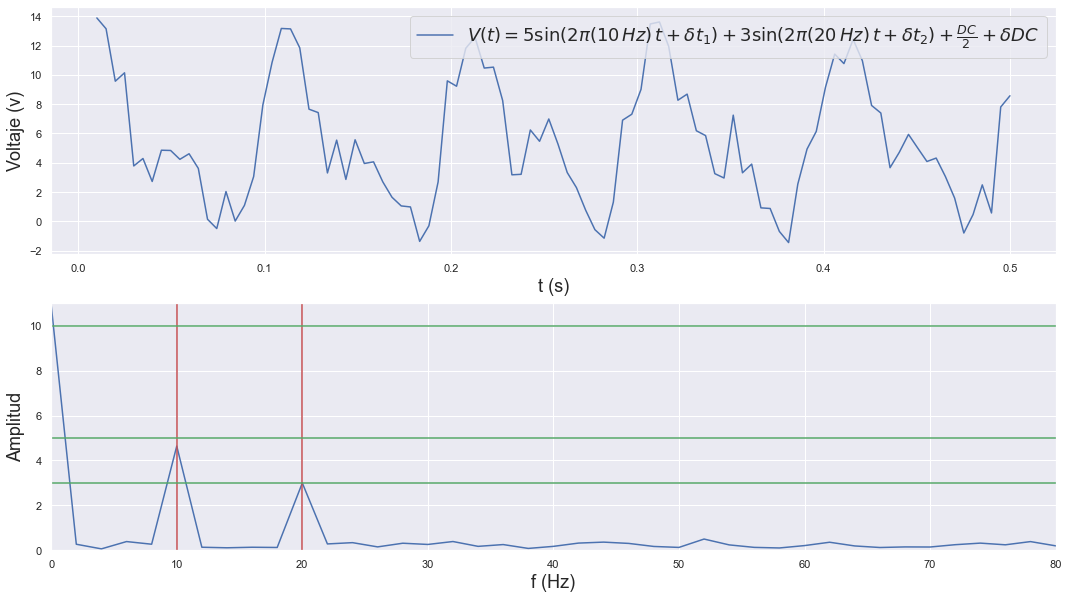

In [7]:
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
plt.plot(t,y,label=r'$V(t)=5\sin(2\pi (10\,Hz)\, t + \delta t_1)+3\sin(2\pi (20\,Hz)\, t + \delta t_2) + \frac{DC}{2} + \delta DC$')
plt.xlabel("t (s)",fontsize=18)
plt.ylabel("Voltaje (v)",fontsize=18)
plt.legend(fontsize=18)

plt.subplot(2,1,2)

f,a=fourier(t,y)
plt.plot(f,a)
#plt.xlim(0,100)
plt.plot([10,10],[20,0],c='r')
plt.plot([20,20],[20,0],c='r')
plt.plot([0,100],[5,5],c='g')
plt.plot([0,100],[3,3],c='g')
plt.plot([0,100],[10,10],c='g')

plt.xlim(0,80)
plt.ylim(0,11)
plt.xlabel('f (Hz)',fontsize=18)
plt.ylabel("Amplitud",fontsize=18)
plt.savefig("ejemplo_tf.png")
plt.show()


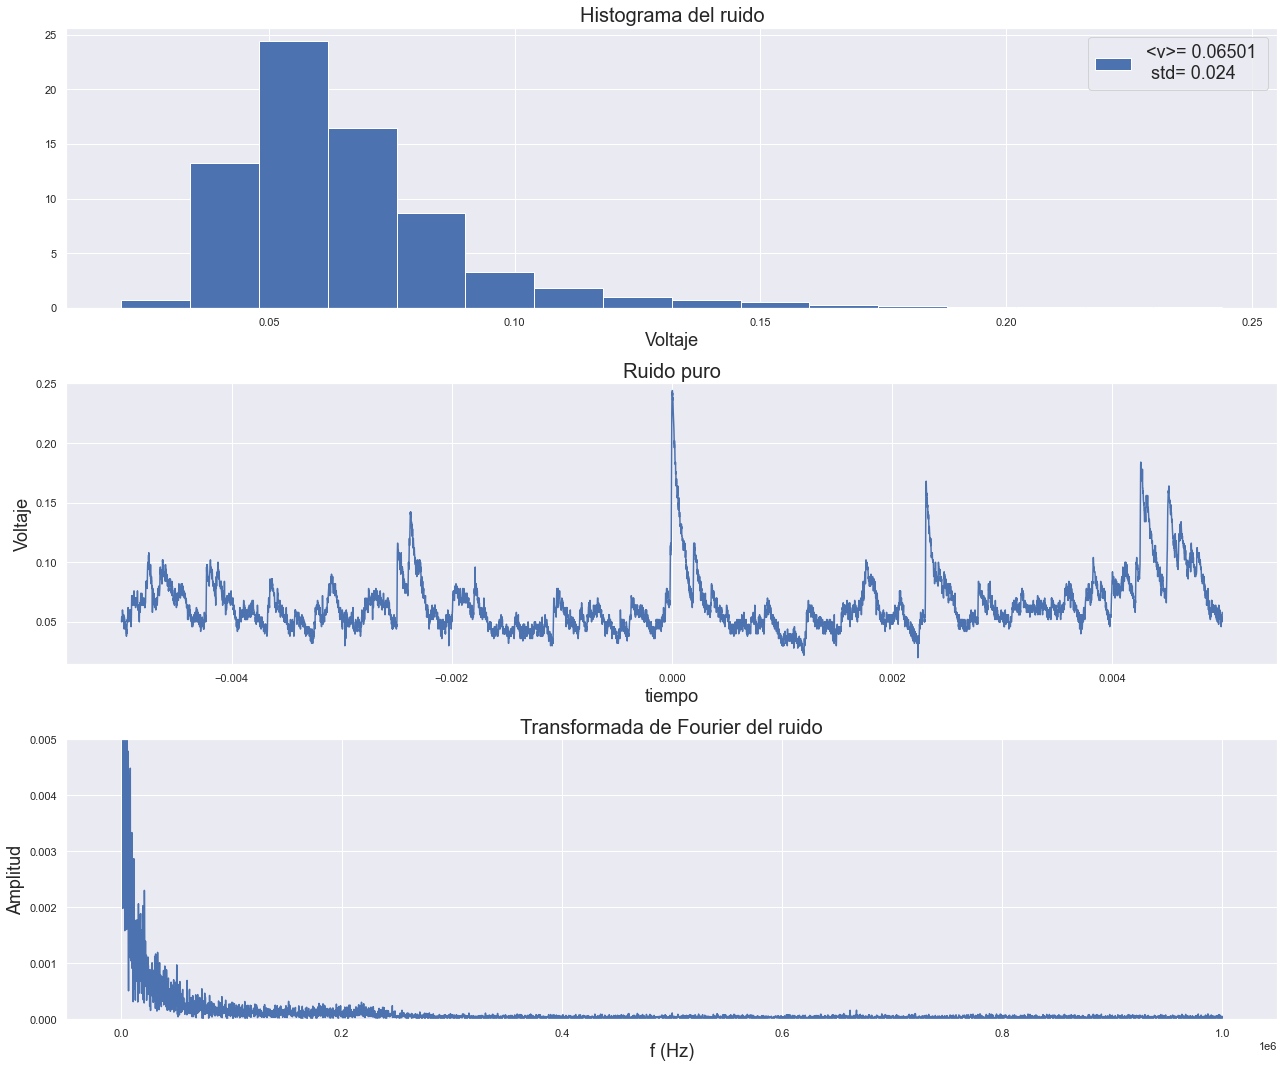

count    10000.000000
mean         0.065013
std          0.024203
min          0.020000
25%          0.050000
50%          0.060000
75%          0.074000
max          0.244000
Name: CH1, dtype: float64
10000


In [8]:
carpeta= "datos_deteccion_directa_intento_2/"
s1, d1 = analisis(carpeta+"pseudo_termica_con_ruido.csv",bins=16,ylim_serie_temporal=(0.015,0.25))
print(len(d1))

0       0.050
1       0.054
2       0.054
3       0.052
4       0.054
        ...  
9995    0.050
9996    0.050
9997    0.054
9998    0.056
9999    0.058
Name: CH1, Length: 10000, dtype: float64


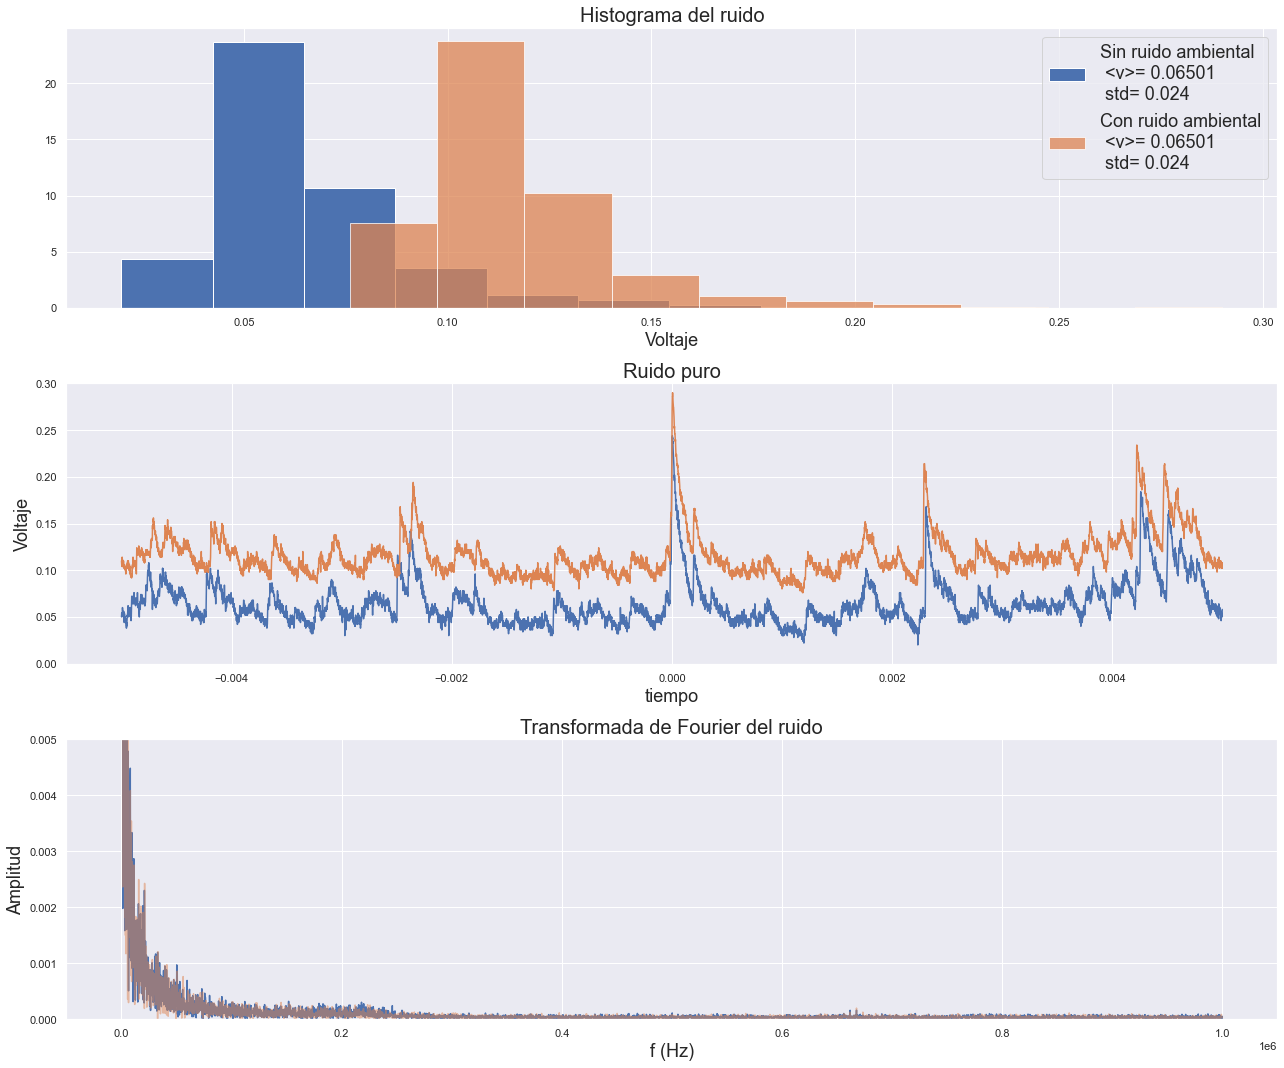

In [9]:
datos_sin_ruido = pd.read_csv("datos_deteccion_directa_intento_2/pseudo_termica_con_ruido.csv")
datos_con_ruido = pd.read_csv("datos_deteccion_directa_intento_2/pseudo-termica_sin_ruido_ambiental.csv")
descripcion_dual(datos_sin_ruido, 
                 datos_con_ruido, 
                 bins=10,
                 ylim_serie_temporal=(0, 0.3), ylim_serie_frecuencias=(0,0.005), invertir=False)

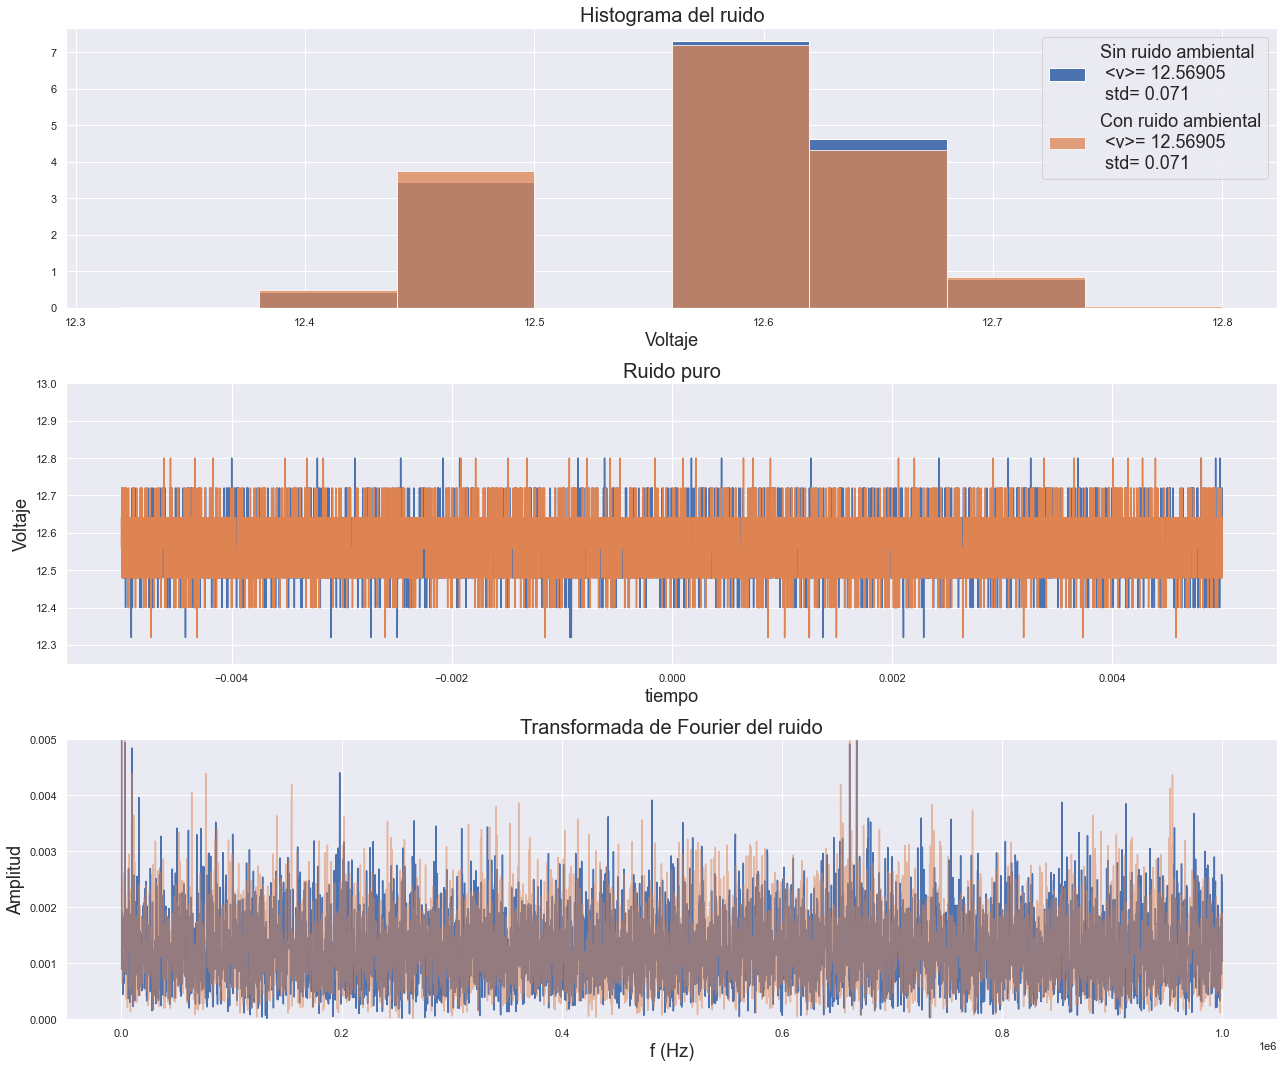

In [21]:
datos_sin_ruido = pd.read_csv("datos_deteccion_directa_intento_2/he_ne_con_ruido.csv")
datos_con_ruido = pd.read_csv("datos_deteccion_directa_intento_2/he_ne_sin_ruido.csv")
descripcion_dual(datos_sin_ruido, 
                 datos_con_ruido, 
                 bins=8,
                 ylim_serie_temporal=(12.25, 13), ylim_serie_frecuencias=(0,0.005), invertir=False)

In [10]:
pd.read_csv("datos_deteccion_directa_intento_2/pseudo_termica_con_ruido.csv")["CH1"]

0       0.050
1       0.054
2       0.054
3       0.052
4       0.054
        ...  
9995    0.050
9996    0.050
9997    0.054
9998    0.056
9999    0.058
Name: CH1, Length: 10000, dtype: float64

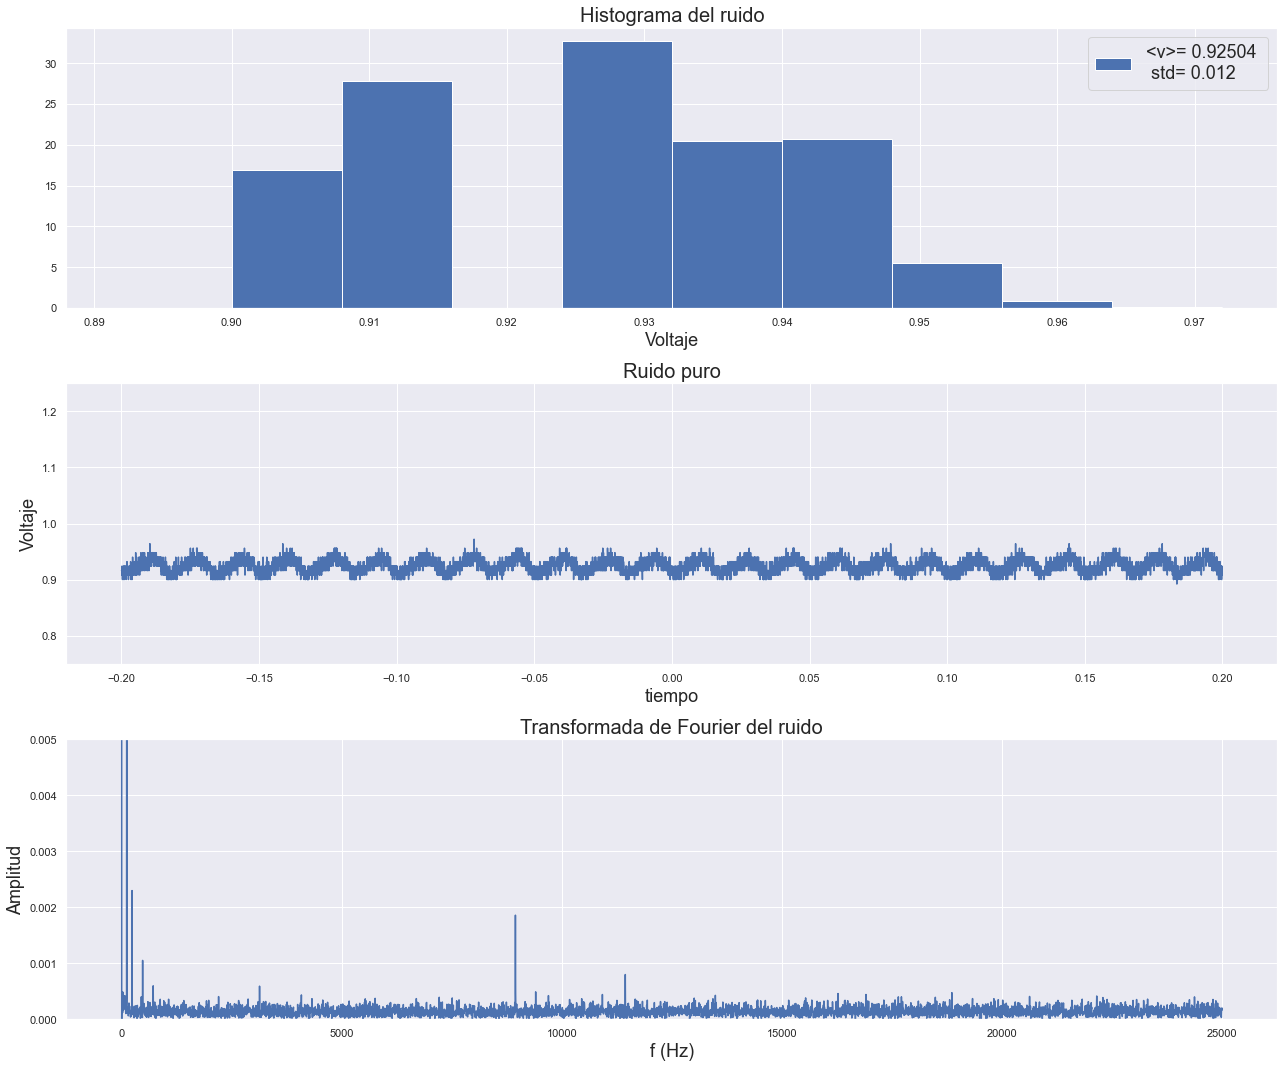

count    10000.000000
mean         0.925038
std          0.012025
min          0.892000
25%          0.916000
50%          0.924000
75%          0.932000
max          0.972000
Name: CH1, dtype: float64
10000


In [17]:
carpeta= "datos_deteccion_directa_intento_2/"
s1, d1 = analisis(carpeta+"tek0003CH1.csv",ylim_serie_temporal=(0.75,1.25))
print(len(d1))

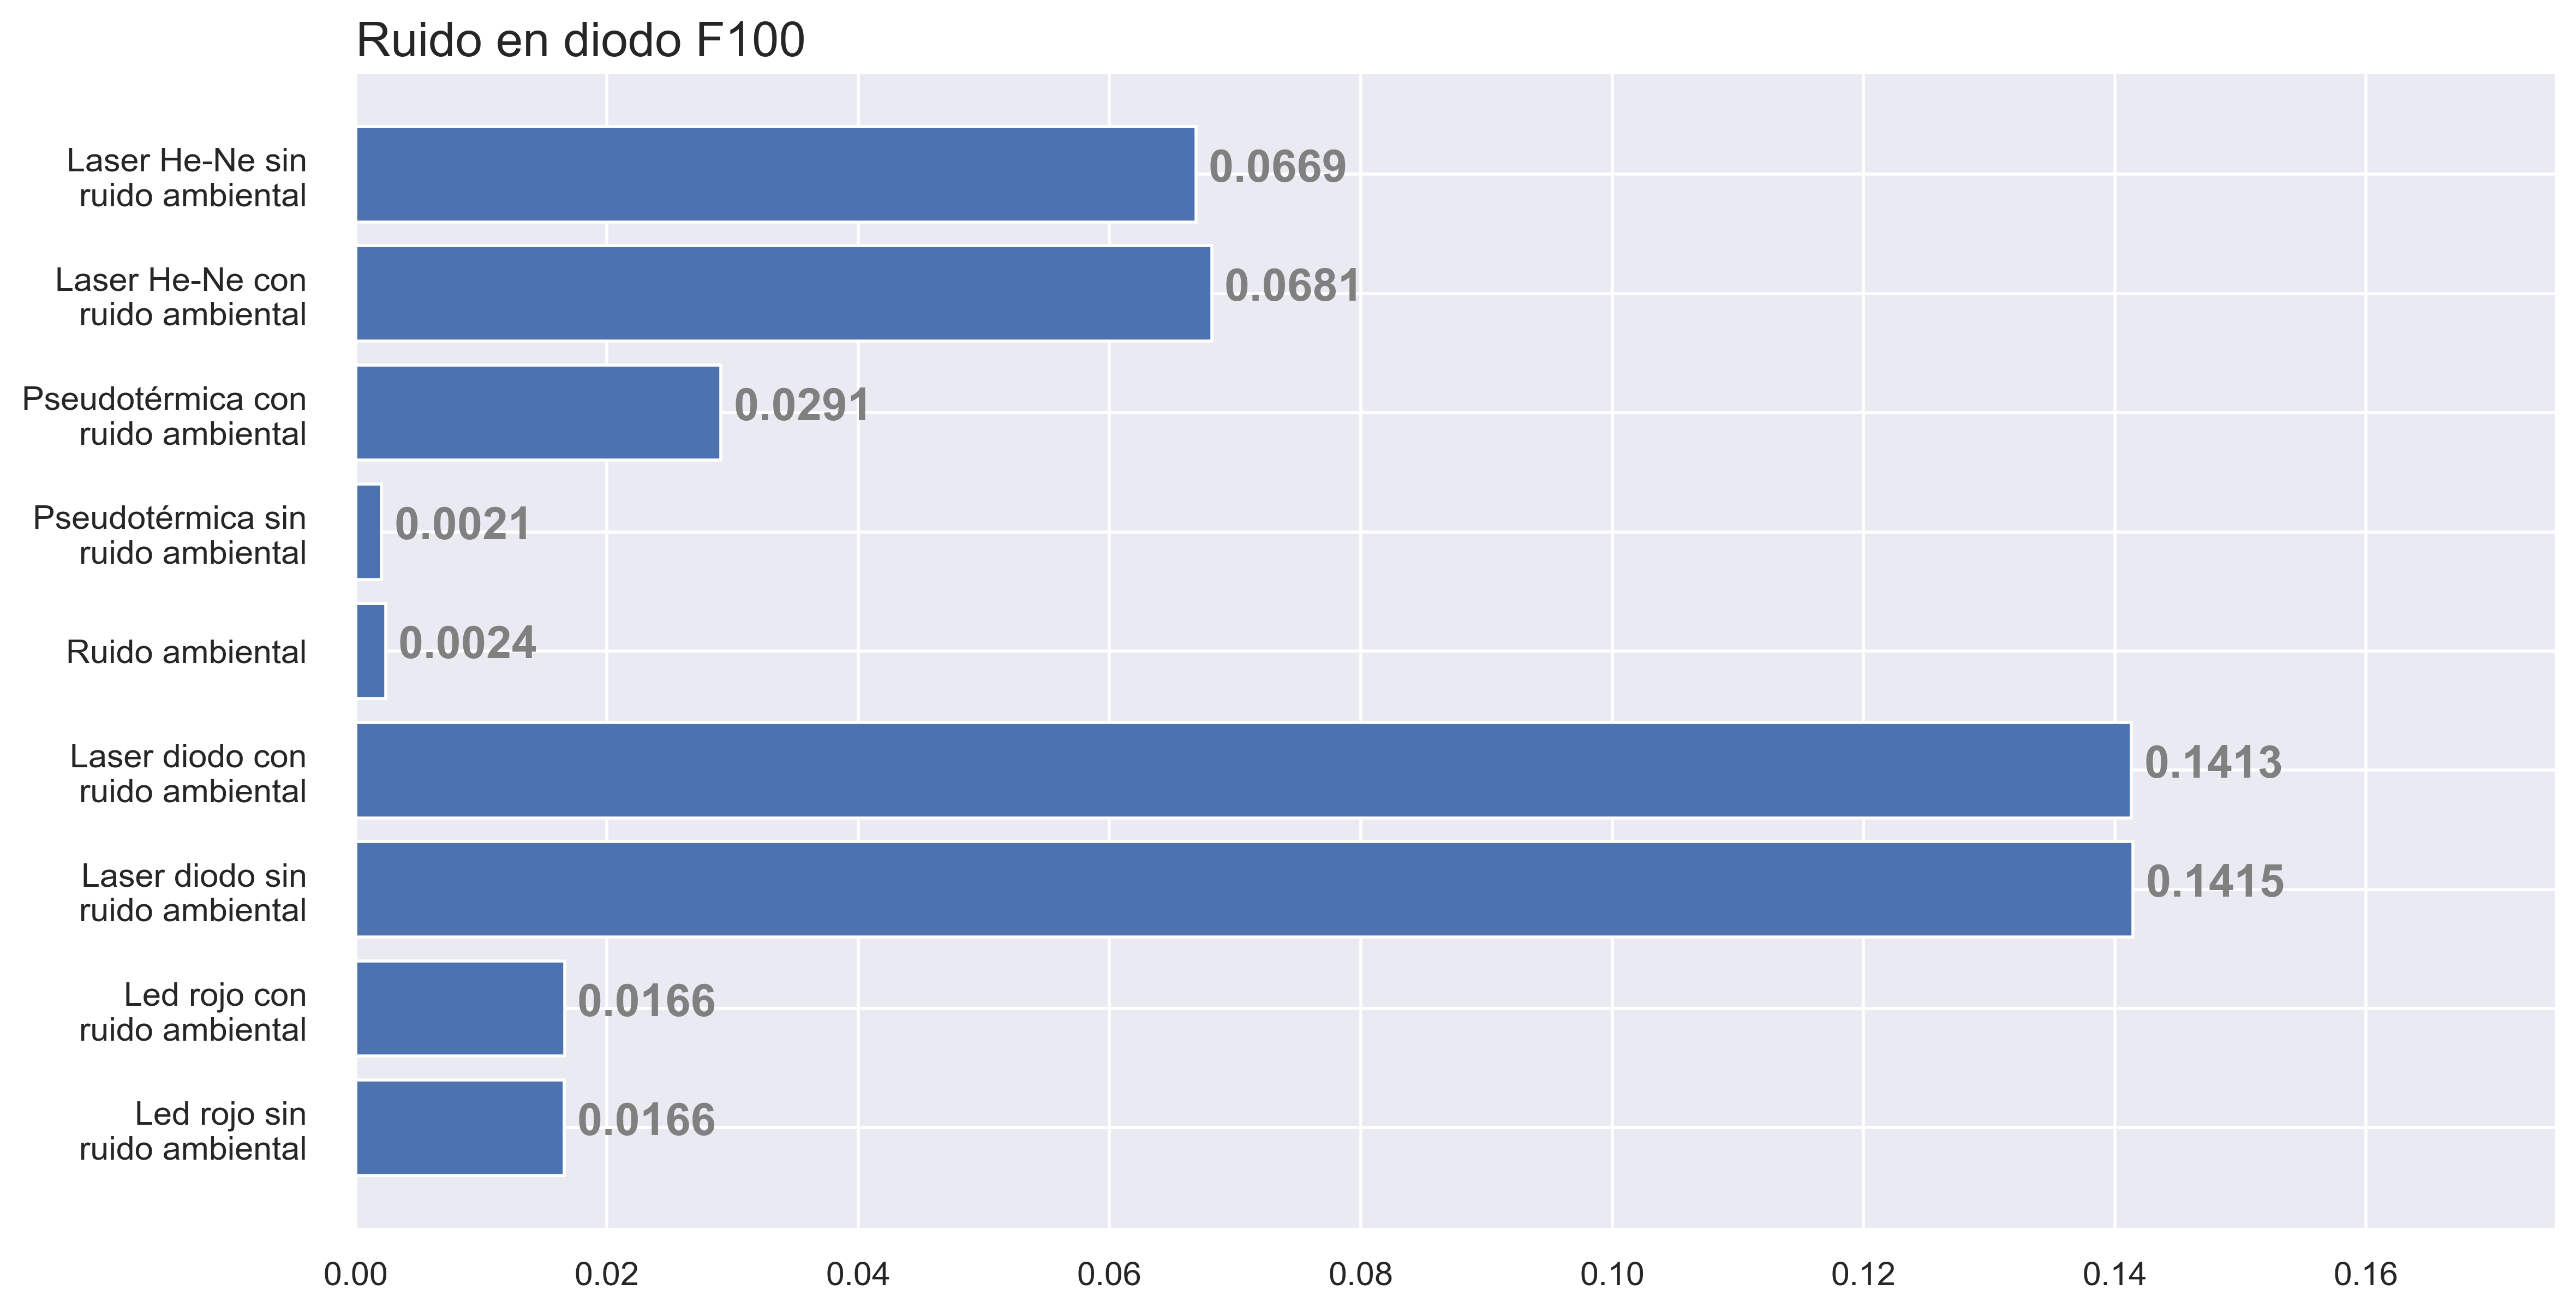

In [21]:
#data = pd.read_csv(r"cars.csv")
#data.head()
#df = pd.DataFrame(data)

name = ["Laser He-Ne sin\n ruido ambiental", 
        "Laser He-Ne con\n ruido ambiental", 
        "Pseudotérmica con\n ruido ambiental",
        "Pseudotérmica sin\n ruido ambiental",
        "Ruido ambiental",
        "Laser diodo con\n ruido ambiental",
        "Laser diodo sin\n ruido ambiental",
        "Led rojo con\n ruido ambiental",
        "Led rojo sin\n ruido ambiental"
       ]
desviaciones_estandar = [
                         statistics_he_ne_100s_sin_ruido_ambiental["std"], 
                         statistics_he_ne_100s_con_ruido_ambiental["std"],
                         statistics_pseudotermica_100s_con_ruido_ambiental["std"],
                         statistics_pseudotermica_100s_sin_ruido_ambiental["std"],
                         statistics_ruido_ambiental_100s["std"],
                         statistics_laser_diodo_100s_con_ruido_ambiental["std"],
                         statistics_laser_diodo_100s_sin_ruido_ambiental["std"],
                         statistics_led_rojo_100s_con_ruido_ambiental["std"],
                         statistics_led_rojo_100s_sin_ruido_ambiental["std"]
                        ]

fig, ax = plt.subplots(figsize =(13, 7))
# Horizontal Bar Plot
ax.barh(name, desviaciones_estandar)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
#ax.grid(b = True, color ='grey',
#        linestyle ='-.', linewidth = 0.5,
#        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.001, i.get_y()+0.46,
             str(round((i.get_width()), 4)),
             fontsize = 15, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_xlim(0,0.175)
ax.set_title('Ruido en diodo F100',
             loc ='left', 
             fontsize=16
            )
fig.set_dpi(400)
plt.savefig("desviaciones_estandar.png")
# Add Text watermark
#fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
#         alpha = 0.7)
 
# Show Plot
plt.show()